In [2]:
import numpy as np
import matplotlib.pyplot as plt
import setFigureConfig as sfc

from colorschemes import get_comp_cols
compcols = get_comp_cols()

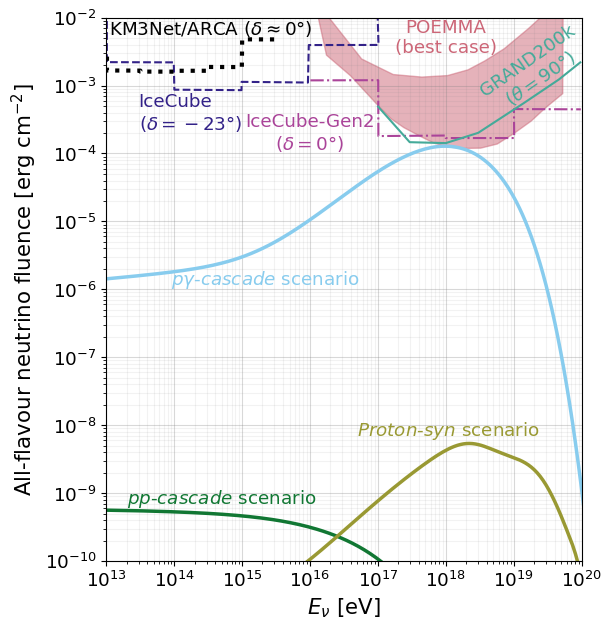

In [8]:
sfc.fullWidth(aspectRatio=1, alpha=1.1)
fig, ax = plt.subplots()
GeV2erg=1.0/624 

# plot sensitivities
EGeV_IceCube, EPhiGeV_IceCube = np.genfromtxt(
    "sensitivities/IceCube.txt", delimiter=", ", skip_header=2).T
ax.loglog(10**EGeV_IceCube,EPhiGeV_IceCube*GeV2erg, 
          ls="--",color=compcols["in"],alpha=1,linewidth=1.5)
ax.text(3e13, 8e-4, "IceCube\n" +r"($\delta=-23°$)", color=compcols["in"], va="top")

EGeV_Gen2, EPhiEGeV_Gen2 = np.genfromtxt(
    "sensitivities/IceCubeGen2.txt", delimiter=", ", skip_header=2).T
ax.loglog(10**EGeV_Gen2, EPhiEGeV_Gen2*GeV2erg, ls="-.",
         color=compcols["pair"], alpha=1, linewidth=1.5)
ax.text(1e16, 4e-4, "IceCube-Gen2\n"+ r"($\delta=0°$)", color=compcols["pair"], va="top", ha="center")

EGeV_Grand, EPhiEGeV_Grand = np.genfromtxt(
    "sensitivities/Grand.txt", delimiter=",", skip_header=2).T
ax.loglog(1e9*EGeV_Grand, EPhiEGeV_Grand*GeV2erg, ls="-",
         color=compcols["pi"], alpha=1, linewidth=1.5)
ax.text(2e19, 9e-3, "GRAND200k\n" +r"($\theta=90°$)", 
        color=compcols["pi"], va="top", ha="center", rotation=35)


EGeV_ARCA, EFEGeV_ARCA = np.genfromtxt("sensitivities/ARCA10yr.txt", delimiter=",", skip_header=2).T
tenyearsinsec = 10*3600*24*365
ax.plot(10**EGeV_ARCA, 3*EFEGeV_ARCA*GeV2erg*tenyearsinsec, ls=":", lw=3,
         color="k", alpha=1)
ax.text(1.1e13, 9.8e-3, "KM3Net/ARCA "+r"($\delta \approx 0°$)", color="k", ha="left", va="top")


EGeV_POEMMA_low, EFEGeV_POEMMA_low = np.genfromtxt("sensitivities/POEMMA_low.txt", delimiter=",", skip_header=2).T
EGeV_POEMMA_high, EFEGeV_POEMMA_high = np.genfromtxt("sensitivities/POEMMA_high.txt", delimiter=",", skip_header=2).T
ax.fill(
    1e9*np.append(EGeV_POEMMA_low,EGeV_POEMMA_high[::-1]),
    GeV2erg * np.append(EFEGeV_POEMMA_low, EFEGeV_POEMMA_high[::-1]),
    alpha=0.5, color=compcols["mu"])
ax.text(1.e18, 9.8e-3, "POEMMA\n(best case)", color=compcols["mu"], va="top", ha="center")


# plot scenarios
t_obs = 1e3 #s
Neu1 = np.genfromtxt("pg-cascade-neutrinos.txt", skip_header=1, delimiter=",")
ax.loglog(Neu1[:, 0], Neu1[:, 1]*t_obs, linewidth=2.5,
          color=compcols["pg"], label=r"$p\gamma$-cas. scenario")
ax.text(9e13, 2e-6, r"$p\gamma$-$cascade$ scenario", color=compcols["pg"], va="top")

Neu2 = np.genfromtxt("pp-cascade-neutrinos.txt", skip_header=1, delimiter=",")
ax.loglog(Neu2[:, 0], Neu2[:, 1]*t_obs, linewidth=2.5,
         color=compcols["pi0"], label=r"$pp$-cas. scenario")
ax.text(2e13, 7e-10, r"$pp$-$cascade$ scenario", color=compcols["pi0"])

Neu3 = np.genfromtxt("proton-syn-neutrinos.txt", skip_header=1, delimiter=",")
ax.loglog(Neu3[:, 0], Neu3[:, 1]*t_obs, linewidth=2.5,
         color=compcols["p"], label=r"$p$-syn scenario")
ax.text(5e16, 7e-9, r"$Proton$-$syn$ scenario", color=compcols["p"])


ax.set_xlabel(r"$E_\nu$ [eV]")
ax.set_ylabel(r"All-flavour neutrino fluence [$\rm erg~cm^{-2}$]")

# ax.set_xticks(fontsize=12)
ax.set_xticks(10.0**np.arange(13, 20.4, 1))
ax.set_yticks(10.0**np.arange(-10, 1, 1))

ax.set_xlim(1e13,1e20)
ax.set_ylim(1e-10,1e-2)

ax.set_aspect('equal')
ax.grid(color="gray", alpha = 0.1, which="minor")
ax.grid(color="gray", alpha = 0.3, which="major")

fig.tight_layout()
fig
sfc.saveFigure(fig, "All-flavour-neutrino-fluence")